In [1]:
import sys
sys.path.append("../")

In [44]:
from collections import defaultdict
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt


In [2]:
from data_generation.data_generator import *

In [8]:
generated_data = generate_synthetic_data(
        num_users=10000,
        countries=['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'],
        platforms=['iOS', 'Android', 'Web', 'Desktop'],
        user_segments=['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'],
        ab_groups=['a1', 'a2', 'b'],
        noise_level=1.0,
        base_increase_percentage=0.05,
        correlation_level=0.5,
    )

In [9]:
generated_data.head()

,userid,country,platform,user_segment,abgroup,age,engagement_score,country_idx,platform_idx,segment_idx,value,pre_test_value
0,1,JP,iOS,Segment_3,a1,54,5.756841,0,0,2,27.354792,19.144481
1,2,FR,Desktop,Segment_1,a1,53,6.518167,0,1,0,94.092273,150.493933
2,3,IN,iOS,Segment_3,a2,34,6.841388,1,0,2,-0.347512,0.613955
3,4,AU,Web,Segment_1,a1,43,6.563071,2,0,0,196.276977,285.992772
4,5,US,Web,Segment_2,a2,53,7.689310,0,0,1,3.189134,7.367707


# Size vs P-value

In [50]:
def generate_per_num_users(n):
    v = []
    for i in range(50):
        generated_data = generate_synthetic_data(
            num_users=n,
            countries=['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'],
            platforms=['iOS', 'Android', 'Web', 'Desktop'],
            user_segments=['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'],
            ab_groups=['a1', 'a2', 'b'],
            noise_level=1.0,
            base_increase_percentage=0.05,
            correlation_level=0.5,
            seed=i
        )
        results = run_analysis(generated_data)
        v.append(results)
    return v

In [51]:
values = []

for n in tqdm(range(100, 10000, 500)):
    v = generate_per_num_users(n)
    values.append((n, v))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [05:54<00:00, 17.70s/it]


In [52]:
results = {
    'no_enhancement': {},
    'cuped': {},
    'gboost_cuped': {}
}

# Extract data and calculate medians
for size, records in values:
    no_enhancement_values = []
    cuped_values = []
    gboost_cuped_values = []

    for record in records:
        no_enhancement_values.append(record['no_enhancement'].result.stat_significance['b'])
        cuped_values.append(record['cuped'].result.stat_significance['b'])
        gboost_cuped_values.append(record['gboost_cuped'].result.stat_significance['b'])

    results['no_enhancement'][size] = np.median(no_enhancement_values)
    results['cuped'][size] = np.median(cuped_values)
    results['gboost_cuped'][size] = np.median(gboost_cuped_values)

# Display the results
for metric_type, sizes in results.items():
    print(f"{metric_type}:")
    for size, median_value in sizes.items():
        print(f"  Size {size}: Median {median_value}")


no_enhancement:
  Size 100: Median 0.48917248847619504
  Size 600: Median 0.3901092156580899
  Size 1100: Median 0.36689104491741975
  Size 1600: Median 0.3643750329592994
  Size 2100: Median 0.21417312383880605
  Size 2600: Median 0.2906578304608429
  Size 3100: Median 0.043754993080954416
  Size 3600: Median 0.12550309795676068
  Size 4100: Median 0.11878099642661177
  Size 4600: Median 0.05458868905516405
  Size 5100: Median 0.09278146896776698
  Size 5600: Median 0.04652590332464658
  Size 6100: Median 0.05096737145984659
  Size 6600: Median 0.0441504252030728
  Size 7100: Median 0.05633028076903662
  Size 7600: Median 0.013209984462468809
  Size 8100: Median 0.00750996189291211
  Size 8600: Median 0.008947290934744782
  Size 9100: Median 0.018354992105122703
  Size 9600: Median 0.01154468905852144
cuped:
  Size 100: Median 0.4590939460985863
  Size 600: Median 0.38396454471047875
  Size 1100: Median 0.3103151385878339
  Size 1600: Median 0.36277741045495665
  Size 2100: Median 0.1

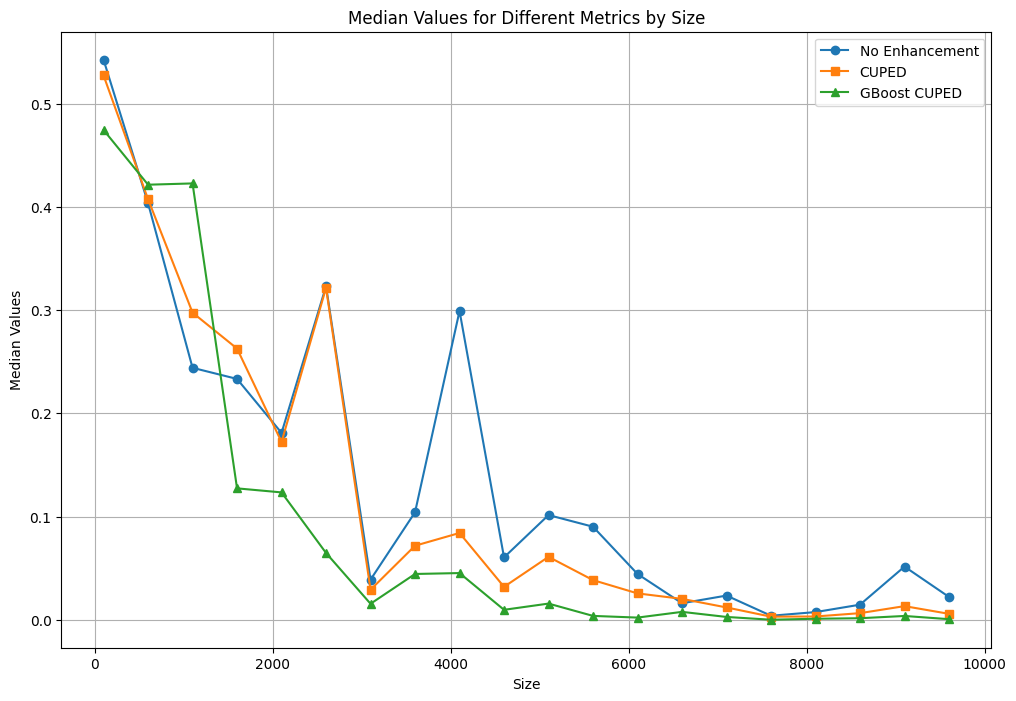

In [49]:

# Plotting the results
plt.figure(figsize=(12, 8))

# Extract sizes and median values for plotting
sizes = list(results['no_enhancement'].keys())
no_enhancement_medians = list(results['no_enhancement'].values())
cuped_medians = list(results['cuped'].values())
gboost_cuped_medians = list(results['gboost_cuped'].values())

plt.plot(sizes, no_enhancement_medians, marker='o', label='No Enhancement')
plt.plot(sizes, cuped_medians, marker='s', label='CUPED')
plt.plot(sizes, gboost_cuped_medians, marker='^', label='GBoost CUPED')

plt.xlabel('Size')
plt.ylabel('Median Values')
plt.title('Median Values for Different Metrics by Size')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
record['no_enhancement'].result.stat_significance['b']

0.8017155513753185

In [36]:
no_enhancement_values.extend()

TypeError: 'numpy.float64' object is not iterable

In [37]:
record['no_enhancement'].result.stat_significance['b']

0.8017155513753185